In [ ]:
# Below is the code used to create evaluation graphs on Google Colab

# While the graphs are created already and available in the Images/ folder and in the report appendices, this code can be run to recreate to verify the correctness
# Dataset route names, and importing the deeporerevised library will need to be adapted for your repository structure

# Model names will need to be edited in the functions to evaluate different trained models, all current functions have the default of the final modle defined

# Please refer to the readme for more clarity on how models and relevant files are named

In [3]:
# If using google colab:
# load google drive content
from google.colab import drive
drive.mount('/content/drive')
# navigate to project folder - replace with relevant directory
%cd /content/drive/MyDrive/hb-final-project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/hb-final-project


In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.io as sio
import matplotlib as matplotlib
import DeePoreRevised as dpr
import os
import random

In [5]:
dataset_3slice = '/content/drive/MyDrive/Project/DeePore_Compact_Data.h5'   # replace with route to three-slice dataset
dataset_6slice = '/content/drive/MyDrive/Project/DeePoreRevised_Compact_Data.h5'  # replace with route to six-slice dataset

In [6]:
# training and validation MSE for all models, loaded from model training output:

dp3_3_train_mse = [0.1387, 0.0504, 0.0188, 0.0126, 0.0109, 0.0100, 0.0092, 0.0087, 0.0082, 0.0079,  # epochs:
                  0.0076, 0.0073, 0.0071, 0.0069, 0.0067, 0.0065, 0.0063, 0.0062, 0.0061, 0.0059,  # 20
                  0.0058, 0.0057, 0.0056, 0.0055, 0.0054, 0.0053, 0.0053, 0.0051, 0.0050, 0.0049,
                  0.0048, 0.0047, 0.0047, 0.0047, 0.0047, 0.0046, 0.0046, 0.0046, 0.0046, 0.0045,   # 40
                  0.0045, 0.0045, 0.0045, 0.0045, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0043,
                  0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0042, 0.0042, 0.0042, 0.0042,    # 60
                  0.0042, 0.0042, 0.0042, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041,
                  0.0041, 0.0041, 0.0040, 0.0040, 0.0040, 0.0040, 0.0040, 0.0040, 0.0040, 0.0040,   # 80
                  0.0040, 0.0039, 0.0039, 0.0039, 0.0039, 0.0039, 0.0039, 0.0039, 0.0039, 0.0039,
                  0.0039, 0.0039, 0.0038, 0.0038, 0.0038, 0.0038, 0.0038, 0.0038, 0.0038, 0.0038]  # 100

dp3_3_val_mse = [0.0843, 0.0285, 0.0146, 0.0118, 0.0106, 0.0098, 0.0092, 0.0087, 0.0083, 0.0080,  # epochs:
                0.0077, 0.0075, 0.0073, 0.0071, 0.0069, 0.0067, 0.0066, 0.0064, 0.0063, 0.0062,   # 20
                0.0061, 0.0060, 0.0059, 0.0058, 0.0057, 0.0056, 0.0055, 0.0054, 0.0053, 0.0052,
                0.0051, 0.0051, 0.0050, 0.0050, 0.0050, 0.0050, 0.0049, 0.0049, 0.0049, 0.0049,   # 40
                0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0047, 0.0047,
                0.0047, 0.0047, 0.0047, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,   # 60
                0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045,
                0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044,   # 80
                0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043,
                0.0043, 0.0043, 0.0043, 0.0042, 0.0042, 0.0042, 0.0042, 0.0042, 0.0042, 0.0042]   # 100




dpr1_3_train_mse = [0.2007, 0.0928, 0.0709, 0.0621, 0.0545, 0.0499, 0.0440, 0.0383, 0.0338, 0.0293,   # epochs:
                     0.0258, 0.0223, 0.0194, 0.0180, 0.0167, 0.0151, 0.0142, 0.0136, 0.0124, 0.0116,  # 20
                     0.0113, 0.0111, 0.0108, 0.0105, 0.0100, 0.0098, 0.0096, 0.0095, 0.0094, 0.0092,
                    0.0088, 0.0085, 0.0082, 0.0078, 0.0075, 0.0073, 0.0071, 0.0069, 0.0066, 0.0063,  # 40
                     0.0060, 0.0060, 0.0058, 0.0054, 0.0053, 0.0053, 0.0052, 0.0052, 0.0052, 0.0051,
                     0.0051, 0.0051, 0.0051, 0.0050, 0.0050, 0.0050, 0.0050, 0.0049, 0.0049, 0.0049,  # 60
                     0.0049, 0.0049, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0047, 0.0047,
                     0.0047, 0.0047, 0.0047, 0.0047, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,  # 80
                     0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0043,
                     0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0042, 0.0042, 0.0042]  # 100

dpr1_3_val_mse = [0.1152, 0.0776, 0.0658, 0.0578, 0.0523, 0.0473, 0.0408, 0.0362, 0.0312, 0.0278,   # epochs:
                   0.0245, 0.0210, 0.0189, 0.0177, 0.0162, 0.0148, 0.0144, 0.0135, 0.0123, 0.0119,    # 20
                   0.0117, 0.0114, 0.0112, 0.0107, 0.0104, 0.0102, 0.0100, 0.0099, 0.0098, 0.0095,
                   0.0091, 0.0088, 0.0085, 0.0081, 0.0078, 0.0076, 0.0074, 0.0072, 0.0069, 0.0067,    # 40
                   0.0065, 0.0064, 0.0061, 0.0058, 0.0058, 0.0057, 0.0057, 0.0057, 0.0056, 0.0056,
                   0.0056, 0.0055, 0.0055, 0.0055, 0.0055, 0.0054, 0.0054, 0.0054, 0.0054, 0.0053,    # 60
                   0.0053, 0.0053, 0.0053, 0.0053, 0.0052, 0.0052, 0.0052, 0.0052, 0.0052, 0.0052,
                   0.0051, 0.0051, 0.0051, 0.0051, 0.0051, 0.0050, 0.0050, 0.0050, 0.0050, 0.0050,    # 80
                   0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0047, 0.0047,
                   0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0046, 0.0046, 0.0046, 0.0046]    # 100




dpr2_3_train_mse = [0.1304, 0.0378, 0.0199, 0.0161, 0.0143, 0.0133, 0.0124, 0.0116, 0.0106, 0.0100,   # epochs:
                    0.0096, 0.0092, 0.0088, 0.0083, 0.0077, 0.0075, 0.0073, 0.0071, 0.0069, 0.0068,   # 20
                    0.0066, 0.0065, 0.0064, 0.0063, 0.0062, 0.0061, 0.0060, 0.0059, 0.0058, 0.0058,
                    0.0057, 0.0056, 0.0056, 0.0055, 0.0055, 0.0054, 0.0054, 0.0053, 0.0053, 0.0052,   # 40
                    0.0052, 0.0052, 0.0051, 0.0051, 0.0051, 0.0050, 0.0050, 0.0050, 0.0050, 0.0049,
                    0.0049, 0.0049, 0.0048, 0.0048, 0.0047, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,   # 60
                    0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044,
                    0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0042, 0.0042, 0.0042, 0.0042,   # 80
                    0.0042, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0040, 0.0040, 0.0040,
                    0.0040, 0.0040, 0.0040, 0.0040, 0.0040, 0.0040, 0.0039, 0.0039, 0.0039, 0.0039]   # 100

dpr2_3_val_mse = [0.0622, 0.0241, 0.0175, 0.0153, 0.0141, 0.0133, 0.0125, 0.0116, 0.0109, 0.0104,   # epochs:
                  0.0100, 0.0096, 0.0092, 0.0085, 0.0082, 0.0080, 0.0078, 0.0077, 0.0075, 0.0074,     # 20
                  0.0072, 0.0071, 0.0070, 0.0069, 0.0068, 0.0067, 0.0066, 0.0065, 0.0065, 0.0064,
                  0.0063, 0.0062, 0.0062, 0.0061, 0.0061, 0.0060, 0.0060, 0.0059, 0.0059, 0.0059,     # 40
                  0.0058, 0.0058, 0.0057, 0.0057, 0.0057, 0.0056, 0.0056, 0.0056, 0.0056, 0.0055,
                  0.0055, 0.0055, 0.0054, 0.0054, 0.0053, 0.0052, 0.0052, 0.0052, 0.0052, 0.0051,     # 60
                  0.0051, 0.0051, 0.0051, 0.0050, 0.0050, 0.0050, 0.0050, 0.0050, 0.0049, 0.0049,
                  0.0049, 0.0049, 0.0049, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0047,     # 80
                  0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0046, 0.0046, 0.0046, 0.0046,
                  0.0046, 0.0046, 0.0046, 0.0046, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045]     # 100




dpr1_6_train_mse = [0.2051, 0.0868, 0.0651, 0.0579, 0.0529, 0.0483, 0.0445, 0.0394, 0.0352, 0.0310,   # epochs:
                    0.0280, 0.0268, 0.0251, 0.0229, 0.0205, 0.0190, 0.0181, 0.0168, 0.0159, 0.0154,   # 20
                    0.0146, 0.0136, 0.0130, 0.0124, 0.0119, 0.0116, 0.0109, 0.0101, 0.0097, 0.0095,
                    0.0094, 0.0093, 0.0092, 0.0091, 0.0090, 0.0088, 0.0083, 0.0082, 0.0081, 0.0080,   # 40
                    0.0080, 0.0079, 0.0078, 0.0078, 0.0077, 0.0077, 0.0076, 0.0075, 0.0074, 0.0074,
                    0.0073, 0.0071, 0.0068, 0.0067, 0.0066, 0.0066, 0.0065, 0.0065, 0.0065, 0.0063,   # 60
                    0.0060, 0.0059, 0.0059, 0.0058, 0.0058, 0.0058, 0.0057, 0.0057, 0.0057, 0.0056,
                    0.0056, 0.0056, 0.0056, 0.0056, 0.0055, 0.0055, 0.0055, 0.0054, 0.0054, 0.0054,   # 80
                    0.0053, 0.0053, 0.0053, 0.0053, 0.0052, 0.0052, 0.0052, 0.0052, 0.0051, 0.0051,
                    0.0051, 0.0051, 0.0050, 0.0050, 0.0050, 0.0050, 0.0050, 0.0049, 0.0049, 0.0049,   # 100
                    0.0049, 0.0049, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0047, 0.0047, 0.0047,
                    0.0047, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0045, 0.0045, 0.0045, 0.0045,   # 120
                    0.0045, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0043, 0.0043, 0.0043,
                    0.0043, 0.0043, 0.0043, 0.0043, 0.0042, 0.0042, 0.0042, 0.0042, 0.0042, 0.0042,   # 140
                    0.0042, 0.0042, 0.0042, 0.0041, 0.0041]

dpr1_6_val_mse = [0.1120, 0.0697, 0.0604, 0.0541, 0.0500, 0.0459, 0.0413, 0.0365, 0.0327, 0.0286,     # epochs:
                  0.0269, 0.0258, 0.0237, 0.0213, 0.0193, 0.0185, 0.0171, 0.0161, 0.0155, 0.0149,     # 20
                  0.0140, 0.0131, 0.0127, 0.0120, 0.0117, 0.0112, 0.0104, 0.0097, 0.0095, 0.0094,
                  0.0093, 0.0092, 0.0091, 0.0090, 0.0089, 0.0084, 0.0082, 0.0081, 0.0080, 0.0080,     # 40
                  0.0079, 0.0079, 0.0078, 0.0078, 0.0077, 0.0076, 0.0075, 0.0075, 0.0074, 0.0074,
                  0.0073, 0.0069, 0.0068, 0.0067, 0.0067, 0.0066, 0.0066, 0.0066, 0.0065, 0.0061,     # 60
                  0.0060, 0.0060, 0.0059, 0.0059, 0.0059, 0.0069, 0.0058, 0.0058, 0.0058, 0.0058,
                  0.0057, 0.0058, 0.0058, 0.0058, 0.0057, 0.0057, 0.0057, 0.0056, 0.0056, 0.0056,     # 80
                  0.0067, 0.0056, 0.0056, 0.0056, 0.0055, 0.0055, 0.0055, 0.0054, 0.0054, 0.0053,
                  0.0053, 0.0053, 0.0052, 0.0052, 0.0052, 0.0060, 0.0052, 0.0052, 0.0051, 0.0051,     # 100
                  0.0051, 0.0051, 0.0050, 0.0050, 0.0050, 0.0050, 0.0050, 0.0049, 0.0049, 0.0049,
                  0.0049, 0.0049, 0.0049, 0.0049, 0.0049, 0.0049, 0.0048, 0.0048, 0.0048, 0.0048,     # 120
                  0.0048, 0.0048, 0.0048, 0.0047, 0.0047, 0.0053, 0.0047, 0.0047, 0.0047, 0.0047,
                  0.0047, 0.0047, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,     # 140
                  0.0046, 0.0046, 0.0046, 0.0045, 0.0045]




dpr2_6_train_mse = [0.1267, 0.0519, 0.0414, 0.0375, 0.0336, 0.0306, 0.0286, 0.0267, 0.0252, 0.0242,   # epochs:
                    0.0229, 0.0218, 0.0207, 0.0201, 0.0198, 0.0194, 0.0187, 0.0183, 0.0175, 0.0166,   # 20
                    0.0162, 0.0157, 0.0155, 0.0148, 0.0140, 0.0138, 0.0136, 0.0133, 0.0130, 0.0126,
                    0.0124, 0.0123, 0.0121, 0.0118, 0.0117, 0.0115, 0.0113, 0.0104, 0.0101, 0.0100,   # 40
                    0.0099, 0.0093, 0.0092, 0.0091, 0.0090, 0.0090, 0.0089, 0.0088, 0.0088, 0.0087,
                    0.0086, 0.0086, 0.0085, 0.0084, 0.0080, 0.0078, 0.0077, 0.0073, 0.0071, 0.0070,   # 60
                    0.0070, 0.0069, 0.0069, 0.0068, 0.0065, 0.0062, 0.0061, 0.0061, 0.0059, 0.0057,
                    0.0056, 0.0056, 0.0056, 0.0055, 0.0055, 0.0055, 0.0054, 0.0054, 0.0054, 0.0053,   # 80
                    0.0053, 0.0053, 0.0052, 0.0052, 0.0052, 0.0051, 0.0051, 0.0051, 0.0051, 0.0050,
                    0.0050, 0.0050, 0.0050, 0.0049, 0.0049, 0.0049, 0.0049, 0.0048, 0.0048, 0.0047,   # 100
                    0.0047, 0.0047, 0.0047, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0045, 0.0045,
                    0.0045, 0.0045, 0.0045, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0044, 0.0043,   # 120
                    0.0043, 0.0043, 0.0043, 0.0043, 0.0043, 0.0042, 0.0042, 0.0042, 0.0042, 0.0042,
                    0.0041, 0.0041, 0.0041, 0.0041, 0.0041, 0.0040, 0.0040, 0.0040, 0.0040, 0.0040,   # 140
                    0.0039, 0.0039, 0.0039, 0.0039, 0.0039]

dpr2_6_val_mse = [0.0632, 0.0442, 0.0384, 0.0356, 0.0320, 0.0296, 0.0276, 0.0257, 0.0248, 0.0236,   # epochs:
                  0.0227, 0.0213, 0.0206, 0.0202, 0.0199, 0.0195, 0.0188, 0.0184, 0.0172, 0.0168,     # 20
                  0.0162, 0.0160, 0.0157, 0.0145, 0.0142, 0.0141, 0.0138, 0.0136, 0.0131, 0.0129,
                  0.0128, 0.0127, 0.0123, 0.0121, 0.0120, 0.0119, 0.0113, 0.0106, 0.0105, 0.0104,     # 40
                  0.0100, 0.0096, 0.0096, 0.0095, 0.0094, 0.0093, 0.0093, 0.0092, 0.0091, 0.0091,
                  0.0090, 0.0089, 0.0089, 0.0087, 0.0082, 0.0081, 0.0080, 0.0075, 0.0074, 0.0074,     # 60
                  0.0073, 0.0073, 0.0073, 0.0071, 0.0067, 0.0066, 0.0065, 0.0065, 0.0065, 0.0062,
                  0.0060, 0.0060, 0.0060, 0.0059, 0.0059, 0.0059, 0.0058, 0.0058, 0.0058, 0.0057,     # 80
                  0.0057, 0.0057, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0055,
                  0.0054, 0.0054, 0.0054, 0.0054, 0.0053, 0.0053, 0.0053, 0.0052, 0.0052, 0.0052,     # 100
                  0.0051, 0.0051, 0.0051, 0.0050, 0.0050, 0.0050, 0.0049, 0.0049, 0.0049, 0.0049,
                  0.0049, 0.0049, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048, 0.0048,     # 120
                  0.0048, 0.0048, 0.0048, 0.0048, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047, 0.0047,
                  0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045,     #140
                  0.0044, 0.0044, 0.0044, 0.0044, 0.0044]





group1_train_mse = [0.1331, 0.0624, 0.0512, 0.0465, 0.0427, # epochs:
             0.0421, 0.0410, 0.0400, 0.0377, 0.0362,   # 10
             0.0352, 0.0337, 0.0322, 0.0311, 0.0303,
             0.0294, 0.0290, 0.0284, 0.0278, 0.0277,  # 20
             0.0275, 0.0265, 0.0263, 0.0262, 0.0261,
             0.0260, 0.0259, 0.0256, 0.0255, 0.0254,   # 30
             0.0245, 0.0241, 0.0234, 0.0228, 0.0227,
             0.0226, 0.0218, 0.0217, 0.0216, 0.0215,  # 40
             0.0208, 0.0206, 0.0197, 0.0188, 0.0187,
             0.0184, 0.0173, 0.0168, 0.0164, 0.0158,  # 50
             0.0157, 0.0151, 0.0144, 0.0137, 0.0136,
             0.0136, 0.0135, 0.0135, 0.0130, 0.0126,  # 60
             0.0125, 0.0125, 0.0124, 0.0124, 0.0124,
             0.0124, 0.0123, 0.0123, 0.0123, 0.0122,  # 70
             0.0122, 0.0122, 0.0122, 0.0121, 0.0121,
             0.0121, 0.0120, 0.0120, 0.0120, 0.0120,  # 80
             0.0119, 0.0119, 0.0119, 0.0119, 0.0118,
             0.0115, 0.0110, 0.0110, 0.0107, 0.0101,  # 90
             0.0094, 0.0089, 0.0084, 0.0083, 0.0083,
             0.0083, 0.0082, 0.0079, 0.0076, 0.0075,  # 100
             0.0075, 0.0075, 0.0075, 0.0075, 0.0074,
             0.0074, 0.0069, 0.0065, 0.0064, 0.0064,  # 110
             0.0064, 0.0064, 0.0064, 0.0063, 0.0063,
             0.0060, 0.0054, 0.0054, 0.0053, 0.0053,  # 120
             0.0053, 0.0053, 0.0048, 0.0045, 0.0045,
             0.0045, 0.0045, 0.0044, 0.0044, 0.0044,  # 130
             0.0044, 0.0044, 0.0044, 0.0044, 0.0044,
             0.0043, 0.0043, 0.0043, 0.0043, 0.0043,  # 140
             0.0043, 0.0043, 0.0043, 0.0043, 0.0043]  # 145

group1_val_mse = [0.0772, 0.0550, 0.0491, 0.0435, 0.0428, # epochs:
           0.0416, 0.0411, 0.0390, 0.0373, 0.0362,  # 10
           0.0344, 0.0339, 0.0321, 0.0310, 0.0307,
           0.0297, 0.0294, 0.0285, 0.0283, 0.0282,  # 20
           0.0274, 0.0270, 0.0269, 0.0267, 0.0266,
           0.0265, 0.0264, 0.0262, 0.0261, 0.0258,  # 30
           0.0247, 0.0246, 0.0235, 0.0234, 0.0233,
           0.0227, 0.0224, 0.0223, 0.0222, 0.0220,  # 40
           0.0212, 0.0211, 0.0196, 0.0194, 0.0193,
           0.0184, 0.0175, 0.0173, 0.0165, 0.0164,  # 50
           0.0163, 0.0153, 0.0144, 0.0143, 0.0142,
           0.0142, 0.0141, 0.0140, 0.0132, 0.0132,  # 60
           0.0131, 0.0131, 0.0131, 0.0130, 0.0130,
           0.0130, 0.0129, 0.0129, 0.0129, 0.0128,  # 70
           0.0128, 0.0128, 0.0127, 0.0127, 0.0127,
           0.0127, 0.0126, 0.0126, 0.0126, 0.0126,  # 80
           0.0125, 0.0125, 0.0125, 0.0125, 0.0124,
           0.0117, 0.0116, 0.0115, 0.0108, 0.0105,  # 90
           0.0097, 0.0090, 0.0089, 0.0088, 0.0088,
           0.0088, 0.0088, 0.0082, 0.0081, 0.0081,  # 100
           0.0080, 0.0080, 0.0080, 0.0080, 0.0080,
           0.0079, 0.0071, 0.0070, 0.0070, 0.0069,  # 110
           0.0069, 0.0069, 0.0069, 0.0069, 0.0068,
           0.0060, 0.0059, 0.0059, 0.0058, 0.0058,  # 120
           0.0058, 0.0057, 0.0051, 0.0050, 0.0050,
           0.0050, 0.0050, 0.0049, 0.0049, 0.0049,  # 130
           0.0049, 0.0049, 0.0049, 0.0049, 0.0048,
           0.0048, 0.0048, 0.0048, 0.0048, 0.0048,  # 140
           0.0048, 0.0047, 0.0047, 0.0047, 0.0047]  # 145



group2_train_mse = [0.1330, 0.0757, 0.0618, 0.0544, 0.0468, # epochs:
             0.0407, 0.0352, 0.0310, 0.0278, 0.0254,  # 10
             0.0241, 0.0231, 0.0222, 0.0212, 0.0196,
             0.0184, 0.0172, 0.0163, 0.0156, 0.0150,  # 20
             0.0144, 0.0138, 0.0134, 0.0131, 0.0127,
             0.0124, 0.0122, 0.0119, 0.0117, 0.0114,  # 30
              0.0111, 0.0107, 0.0105, 0.0102, 0.0100,
              0.0098, 0.0096, 0.0094, 0.0088, 0.0082, # 40
              0.0079, 0.0077, 0.0076, 0.0074, 0.0073,
              0.0071, 0.0070, 0.0069, 0.0068, 0.0067, # 50
              0.0065, 0.0064, 0.0063, 0.0062, 0.0061,
              0.0060, 0.0059, 0.0058, 0.0057, 0.0056, # 60
              0.0055, 0.0054, 0.0054, 0.0053, 0.0052,
              0.0051, 0.0051, 0.0050, 0.0050, 0.0049, # 70
              0.0048, 0.0048, 0.0047, 0.0047, 0.0046,
              0.0046, 0.0045, 0.0045, 0.0045, 0.0044, # 80
              0.0044, 0.0043, 0.0043, 0.0042, 0.0042,
              0.0042, 0.0041, 0.0041, 0.0040, 0.0040, # 90
              0.0040, 0.0039, 0.0039, 0.0039, 0.0038,
              0.0038, 0.0038, 0.0038, 0.0037, 0.0037, # 100
              0.0037, 0.0036, 0.0036, 0.0036, 0.0036,
              0.0035, 0.0035, 0.0035, 0.0035, 0.0035, # 110
              0.0034, 0.0034, 0.0034, 0.0034, 0.0033,
              0.0033, 0.0033, 0.0033, 0.0033, 0.0032, # 120
              0.0032, 0.0032, 0.0032, 0.0032, 0.0032,
              0.0031, 0.0031, 0.0031, 0.0031, 0.0031, # 130
              0.0031, 0.0030, 0.0030, 0.0030, 0.0030,
              0.0030, 0.0030, 0.0029, 0.0029, 0.0029, # 140
              0.0029, 0.0029, 0.0029, 0.0029, 0.0028] # 145



group2_val_mse = [ 0.0917, 0.0656, 0.0572, 0.0501, 0.0435,  # epochs:
           0.0381, 0.0331, 0.0299, 0.0268, 0.0252,  # 10
           0.0241, 0.0232, 0.0223, 0.0209, 0.0194,
           0.0181, 0.0171, 0.0163, 0.0157, 0.0150,  # 20
           0.0144, 0.0140, 0.0136, 0.0133, 0.0129,
           0.0126, 0.0124, 0.0121, 0.0119, 0.0116,   # 30
            0.0112, 0.0109, 0.0107, 0.0105, 0.0103,
            0.0101, 0.0099, 0.0095, 0.0088, 0.0084, # 40
            0.0082, 0.0081, 0.0079, 0.0078, 0.0077,
            0.0076, 0.0074, 0.0073, 0.0072, 0.0071, # 50
            0.0070, 0.0069, 0.0068, 0.0067, 0.0066,
            0.0065, 0.0064, 0.0063, 0.0062, 0.0061, # 60
            0.0061, 0.0060, 0.0059, 0.0058, 0.0058,
            0.0057, 0.0057, 0.0056, 0.0056, 0.0055, # 70
            0.0054, 0.0054, 0.0053, 0.0053, 0.0052,
            0.0052, 0.0052, 0.0051, 0.0051, 0.0050, # 80
            0.0050, 0.0049, 0.0049, 0.0049, 0.0048,
            0.0048, 0.0047, 0.0047, 0.0047, 0.0046, # 90
            0.0046, 0.0046, 0.0046, 0.0045, 0.0045,
            0.0045, 0.0045, 0.0044, 0.0044, 0.0043, # 100
            0.0043, 0.0043, 0.0042, 0.0042, 0.0042,
            0.0042, 0.0041, 0.0041, 0.0041, 0.0041, # 110
            0.0040, 0.0040, 0.0040, 0.0040, 0.0040,
            0.0039, 0.0039, 0.0039, 0.0039, 0.0039, # 120
            0.0038, 0.0038, 0.0038, 0.0038, 0.0038,
            0.0037, 0.0037, 0.0037, 0.0037, 0.0037, # 130
            0.0036, 0.0036, 0.0036, 0.0036, 0.0036,
            0.0036, 0.0035, 0.0035, 0.0035, 0.0035, # 140
            0.0035, 0.0035, 0.0035, 0.0034, 0.0034] # 145

In [7]:
# when plotting MSE graphs, add final value to three-slice trained data to make array length the same

# add same value to end of 3 slice arrays
lastval=dp3_3_train_mse[-1]
repeated = np.full(45, lastval)
dp3_3_train_mse = np.concatenate((dp3_3_train_mse, repeated))
lastval=dp3_3_val_mse[-1]
repeated = np.full(45, lastval)
dp3_3_val_mse = np.concatenate((dp3_3_val_mse, repeated))

lastval=dpr1_3_train_mse[-1]
repeated = np.full(45, lastval)
dpr1_3_train_mse = np.concatenate((dpr1_3_train_mse, repeated))
lastval=dpr1_3_val_mse[-1]
repeated = np.full(45, lastval)
dpr1_3_val_mse = np.concatenate((dpr1_3_val_mse, repeated))

lastval=dpr2_3_train_mse[-1]
repeated = np.full(45, lastval)
dpr2_3_train_mse = np.concatenate((dpr2_3_train_mse, repeated))
lastval=dpr2_3_val_mse[-1]
repeated = np.full(45, lastval)
dpr2_3_val_mse = np.concatenate((dpr2_3_val_mse, repeated))


In [8]:
# Plotting train/val MSE for models trained on all properties:
def plot_all_models():
  # all training/val mse
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  epochs_6 = np.arange(1, 146)

  # Plot 1
  axs[0].plot(epochs_6, dp3_3_train_mse, label='DeePore 3 - 3 slice')
  axs[0].plot(epochs_6, dpr1_3_train_mse, label='DeePoreRevised 1 - 3 slice')
  axs[0].plot(epochs_6, dpr2_3_train_mse, label='DeePoreRevised 2 - 3 slice')
  axs[0].plot(epochs_6, dpr1_6_train_mse, label='DeePoreRevised 1 - 6 slice')
  axs[0].plot(epochs_6, dpr2_6_train_mse, label='DeePoreRevised 2 - 6 slice')
  axs[0].set_xlabel('Training Epochs')
  axs[0].set_ylabel('Training Mean Squared Error')
  axs[0].legend()
  axs[0].set_yscale('log')
  axs[0].set_xlim(left=0, right=145)
  axs[0].set_title('Training MSE')

  axs[1].plot(epochs_6, dp3_3_val_mse, label='DeePore 3 - 3 slice')
  axs[1].plot(epochs_6, dpr1_3_val_mse, label='DeePoreRevised 1 - 3 slice')
  axs[1].plot(epochs_6, dpr2_3_val_mse, label='DeePoreRevised 2 - 3 slice')
  axs[1].plot(epochs_6, dpr1_6_val_mse, label='DeePoreRevised 1 - 6 slice')
  axs[1].plot(epochs_6, dpr2_6_val_mse, label='DeePoreRevised 2 - 6 slice')
  axs[1].set_xlabel('Training Epochs')
  axs[1].set_ylabel('Validating Mean Squared Error')
  axs[1].legend()
  axs[1].set_yscale('log')
  axs[1].set_xlim(left=0, right=145)
  axs[1].set_title('Validating MSE')


  plt.tight_layout()

  plt.show()


In [9]:
# Plotting train/val MSE for final on different property groupings:
def plot_finalmodel_groups():
  # final model
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  epochs_6 = np.arange(1, 146)

  # Plot 1
  axs[0].plot(epochs_6, dpr2_6_train_mse, label='All properties')
  axs[0].plot(epochs_6, group1_train_mse, label='Group 1')
  axs[0].plot(epochs_6, group2_train_mse, label='Group 2')

  axs[0].set_xlabel('Training Epochs')
  axs[0].set_ylabel('Training Mean Squared Error')
  axs[0].legend()
  axs[0].set_yscale('log')
  axs[0].set_xlim(left=0, right=145)
  axs[0].set_title('Training MSE')

  axs[1].plot(epochs_6, dpr2_6_val_mse, label='All properties')
  axs[1].plot(epochs_6, group1_val_mse, label='Group 1')
  axs[1].plot(epochs_6, group2_val_mse, label='Group 2')

  axs[1].set_xlabel('Training Epochs')
  axs[1].set_ylabel('Validating Mean Squared Error')
  axs[1].legend()
  axs[1].set_yscale('log')
  axs[1].set_xlim(left=0, right=145)
  axs[1].set_title('Validating MSE')


  plt.tight_layout()

  plt.show()

In [39]:
# Plot single value ref/estimate
def plot_singval_estimate_all():
  # Load the .mat file containing true and predicted values
  data = sio.loadmat('Tested_Data_Model12_S2_P1515.mat')    # replace this with other models!

  # Extract true and predicted values
  y = data['y']
  y2 = data['y2']

  fig=plt.figure(figsize=(30,40))
  plt.rcParams.update({'font.size': 30})
  plt.rcParams.update({'font.family': 'serif'})

  with open('VarNames.txt') as f:
      VarNames = list(f)
  plt.subplots_adjust(hspace=0.35, wspace=0.25)
  for I in range(15):       # replace with 'for I in group_1:' or 'for I in group_2:' to if checking group1/group2 trained models
      ax = fig.add_subplot(5,3,I+1)
      X=y[:,I]
      Y=y2[:,I]
      plt.grid(True)
      plt.scatter(X,Y, alpha=0.5, s=100, color='darkblue')
      plt.ylabel('Estimated', fontname='serif')
      plt.xlabel('Ref. ' + VarNames[I], fontname='serif')
      plt.tick_params(direction="in", axis="both", length=10, labelsize=25, width=2, top=True, bottom=True, left=True, right=True )
      min_val = min(np.min(X), np.min(Y))
      max_val = max(np.max(X), np.max(Y))
      plt.xlim(min_val,max_val)
      plt.ylim(min_val,max_val)

      plt.plot([min_val, max_val], [min_val, max_val], color='maroon',  linewidth=8)

      if I==0:
          ax.set_yscale('log')
          ax.set_xscale('log')
          plt.xlim(0.01, 1.5)
          plt.ylim(0.01, 1.5)
      if I == 1:
          ax.set_yscale('log')
          ax.set_xscale('log')
          plt.xlim(right=100)
          plt.ylim(top=100)
  plt.show()





# Plot single value ref/estimate
def plot_singval_estimate_group():
  # Load the .mat file containing true and predicted values
  data = sio.loadmat('Tested_Data_Model12_S2_P508.mat')    # replace this with other models!

  # Extract true and predicted values
  y = data['y']
  y2 = data['y2']

  group_1 = [1,4,7,8,9,10,12]
  group_1 = [x-1 for x in group_1]
  group_2 = [2,3,5,6,11,13,14,15]
  group_2 = [x-1 for x in group_2]

  fig=plt.figure(figsize=(35,30))
  plt.rcParams.update({'font.size': 30})
  plt.rcParams.update({'font.family': 'serif'})

  with open('VarNames.txt') as f:
      VarNames = list(f)
  plt.subplots_adjust(hspace=0.35, wspace=0.25)
  count = 0
  for I in (group_2):       # replace with 'for I in group_1:' or 'for I in group_2:' if checking group1/group2 trained models
      ax = fig.add_subplot(3,3,count+1)
      X=y[:,count]
      Y=y2[:,count]
      plt.grid(True)
      plt.scatter(X,Y, alpha=0.5, s=100, color='darkblue')
      plt.ylabel('Estimated', fontname='serif')
      plt.xlabel('Ref. ' + VarNames[I], fontname='serif')
      plt.tick_params(direction="in", axis="both", length=10, labelsize=25, width=2, top=True, bottom=True, left=True, right=True )
      min_val = min(np.min(X), np.min(Y))
      max_val = max(np.max(X), np.max(Y))
      plt.xlim(min_val,max_val)
      plt.ylim(min_val,max_val)

      count += 1

      plt.plot([min_val, max_val], [min_val, max_val], color='maroon',  linewidth=8)

      if I==0:
          ax.set_yscale('log')
          ax.set_xscale('log')
          plt.xlim(0.01, 1.5)
          plt.ylim(0.01, 1.5)
      if I == 1:
          ax.set_yscale('log')
          ax.set_xscale('log')
          plt.xlim(right=100)
          plt.ylim(top=100)
  plt.show()





In [40]:
# plot function/distribution reference and estimate for all values
def plot_rangeval_estimate_all():
  # Load the .mat file containing true and predicted values
  data = sio.loadmat('Tested_Data_Model12_S2_P1515.mat')        # replace with other model names for different visualisations

  # Extract true and predicted values
  y = data['y']
  y2 = data['y2']

  fig=plt.figure(figsize=(25,35))
  plt.rcParams.update({'font.size': 20})
  plt.rcParams.update({'font.family': 'serif'})

  with open('VarNames.txt') as f:
    VarNames = list(f)

  VarNames[16] = 'Wetting Rel. Perm. (ratio)'
  VarNames[17] = 'N-Wetting Rel. Perm. (ratio)'
  VarNames[18] = 'Correlation Function'

  plt.subplots_adjust(hspace=0.35, wspace=0.25)

  # random_num = random.randint(1,1000)
  # print(random_num) # 127 chosen from random num generator for consistency among model testing

  normalRange = list(range(1,101))
  normalRange = [x/100 for x in normalRange]

  fiftyRange = [x*50 for x in normalRange]

  for I in range(15):
    ax = fig.add_subplot(5,3,I+1)
    ref = y[127, (I*100)+15:(I*100)+115]
    est = y2[127, (I*100)+15:(I*100)+115]
    plt.tick_params(direction="in", axis="both", length=5, labelsize=15, width=2, top=True, bottom=True, left=True, right=True )
    plt.grid(True)
    t=VarNames[I].strip()

    if I+15 in [15,16,17]:
        plt.ylabel(t)
        plt.xlabel('Wetting Phase Sat. (Sw)')
        plt.plot(normalRange, ref, label="Reference",color='darkblue', linewidth=2)
        plt.plot(normalRange, est, label="Estimated", color='brown',linewidth=2)
        plt.xticks([0,0.5,1])
        plt.yticks([0,0.5,1])

    elif I+15 in [18]:
        plt.ylabel(str(t))
        plt.xlabel('Lag (px)')
        plt.plot(fiftyRange, ref, label="Reference", color='darkblue', linewidth=2)
        plt.plot(fiftyRange, est, label="Estimated", color='brown', linewidth=2)
        plt.xticks([0,20,40])
        plt.yticks([0.1,0.2,0.3, 0.4])

    else:
        plt.xlabel(str(t))
        plt.ylabel('Cum. Probability')
        plt.plot(ref, normalRange, label="Reference",color='darkblue',linewidth=2)
        plt.plot(est, normalRange, label="Estimated", color='brown', linewidth=2)
        plt.yticks([0,0.5,1])

    if I == 3:
      plt.legend()


  plt.show()





# plot function/distribution reference and estimate for subgroups
def plot_rangeval_estimate_group():

  # Load the .mat file containing true and predicted values
  data = sio.loadmat('Tested_Data_Model12_S2_P508.mat')        # replace with other model names for different visualisations

  # Extract true and predicted values
  y = data['y']
  y2 = data['y2']

  group_1 = [16,17,18,20,21,22,23,24,25,26]
  group_1 = [x-1 for x in group_1]
  group_2 = [19,27,28,29,30]
  group_2 = [x-1 for x in group_2]

  fig=plt.figure(figsize=(25,35))
  plt.rcParams.update({'font.size': 20})
  plt.rcParams.update({'font.family': 'serif'})

  with open('VarNames.txt') as f:
    VarNames = list(f)

  VarNames[16] = 'Wetting Rel. Perm. (ratio)'
  VarNames[17] = 'N-Wetting Rel. Perm. (ratio)'
  VarNames[18] = 'Correlation Function'

  plt.subplots_adjust(hspace=0.35, wspace=0.25)

  # random_num = random.randint(1,1000)
  # print(random_num) # 127 chosen from random num generator for consistency among model testing

  normalRange = list(range(1,101))
  normalRange = [x/100 for x in normalRange]

  fiftyRange = [x*50 for x in normalRange]

  count = 0
  for I in group_2:               # replace with 'for I in group_1:' or 'for I in group_2:' to if checking group1/group2 trained models
    ax = fig.add_subplot(5,3,count+1)
    ref = y[127, (count*100)+8:(count*100)+108]
    est = y2[127, (count*100)+8:(count*100)+108]
    plt.tick_params(direction="in", axis="both", length=5, labelsize=15, width=2, top=True, bottom=True, left=True, right=True )
    plt.grid(True)
    t=VarNames[I].strip()

    if I in [15,16,17]:
        plt.ylabel(t)
        plt.xlabel('Wetting Phase Sat. (Sw)')
        plt.plot(normalRange, ref, label="Reference",color='darkblue', linewidth=2)
        plt.plot(normalRange, est, label="Estimated", color='brown',linewidth=2)
        plt.xticks([0,0.5,1])
        plt.yticks([0,0.5,1])

    elif I in [18]:
        plt.ylabel(str(t))
        plt.xlabel('Lag (px)')
        plt.plot(fiftyRange, ref, label="Reference", color='darkblue', linewidth=2)
        plt.plot(fiftyRange, est, label="Estimated", color='brown', linewidth=2)
        plt.xticks([0,20,40])
        plt.yticks([0.1,0.2,0.3, 0.4])

    else:
        plt.xlabel(str(t))
        plt.ylabel('Cum. Probability')
        plt.plot(ref, normalRange, label="Reference",color='darkblue',linewidth=2)
        plt.plot(est, normalRange, label="Estimated", color='brown', linewidth=2)
        plt.yticks([0,0.5,1])

    if I == 17:
      plt.legend()

    count += 1

  plt.show()


In [49]:
# plot distribution of single values for reference and estimate for all properties
def plot_singval_dist_all():
  # Load the .mat file containing true and predicted values
  data = sio.loadmat('Tested_Data_Model12_S2_P1515.mat')

  group_1 = [1,4,7,8,9,10,12]
  group_1 = [x-1 for x in group_1]

  group_2 = [2,3,5,6,11,13,14,15,19,27,28,29,30]
  group_2 = [x-1 for x in group_2]


  plt.rcParams.update({'font.family': 'serif'})

  # Extract true and predicted values
  y = data['y']
  y2 = data['y2']

  fig=plt.figure(figsize=(30,40))

  with open('VarNames.txt') as f:
      VarNames = list(f)
  plt.subplots_adjust(hspace=0.35, wspace=0.25)

  for I in range(0,15):
      ax = fig.add_subplot(5,3,I+1)

      # Create a histogram
      hist, bins = np.histogram(y2[:,I], bins=50, density=True)
      # Calculate the probability for each bin
      bin_centers = (bins[:-1] + bins[1:]) / 2
      probabilities = hist * np.diff(bins)
      # Plot the estimated values against their corresponding probabilities using a line chart
      plt.plot(bin_centers, probabilities, linestyle='-', label='Estimated - Group 1',color='brown',linewidth=3)

      # Create a histogram
      hist, bins = np.histogram(y[:,I], bins=50, density=True)
      # Calculate their probability for each bin
      bin_centers = (bins[:-1] + bins[1:]) / 2
      probabilities = hist * np.diff(bins)
      # Plot the estimated values against their corresponding probabilities using a line chart
      plt.plot(bin_centers, probabilities, linestyle='-', color='darkblue', label='Reference',linewidth=3)

      plt.xlabel(VarNames[I])
      plt.ylabel('Probability')
      plt.grid(True)

      if I==0 or I==1:
        ax.set_xscale('log')

      if I == 6:
        plt.legend()


  plt.show()







# plot distribution of single values for reference and estimate for property groups
def plot_singval_dist_group():
  # Load the .mat file containing true and predicted values
  data = sio.loadmat('Tested_Data_Model12_S2_P508.mat')

  group_1 = [1,4,7,8,9,10,12]
  group_1 = [x-1 for x in group_1]
  group_2 = [2,3,5,6,11,13,14,15,19,27,28,29,30]
  group_2 = [x-1 for x in group_2]


  plt.rcParams.update({'font.family': 'serif'})

  # Extract true and predicted values
  y = data['y']
  y2 = data['y2']

  fig=plt.figure(figsize=(30,30))

  with open('VarNames.txt') as f:
      VarNames = list(f)
  plt.subplots_adjust(hspace=0.35, wspace=0.25)

  count = 0
  for I in group_2:
      ax = fig.add_subplot(5,3,count+1)

      # Create a histogram
      hist, bins = np.histogram(y2[:,count], bins=50, density=True)
      # Calculate the probability for each bin
      bin_centers = (bins[:-1] + bins[1:]) / 2
      probabilities = hist * np.diff(bins)
      # Plot the estimated values against their corresponding probabilities using a line chart
      plt.plot(bin_centers, probabilities, linestyle='-', label='Estimated - Group 1',color='brown',linewidth=3)

      # Create a histogram
      hist, bins = np.histogram(y[:,count], bins=50, density=True)
      # Calculate their probability for each bin
      bin_centers = (bins[:-1] + bins[1:]) / 2
      probabilities = hist * np.diff(bins)
      # Plot the estimated values against their corresponding probabilities using a line chart
      plt.plot(bin_centers, probabilities, linestyle='-', color='darkblue', label='Reference',linewidth=3)

      plt.xlabel(VarNames[I])
      plt.ylabel('Probability')
      plt.grid(True)

      count += 1

      if I==0 or I==1:
        ax.set_xscale('log')

      if I == 6:
        plt.legend()


  plt.show()



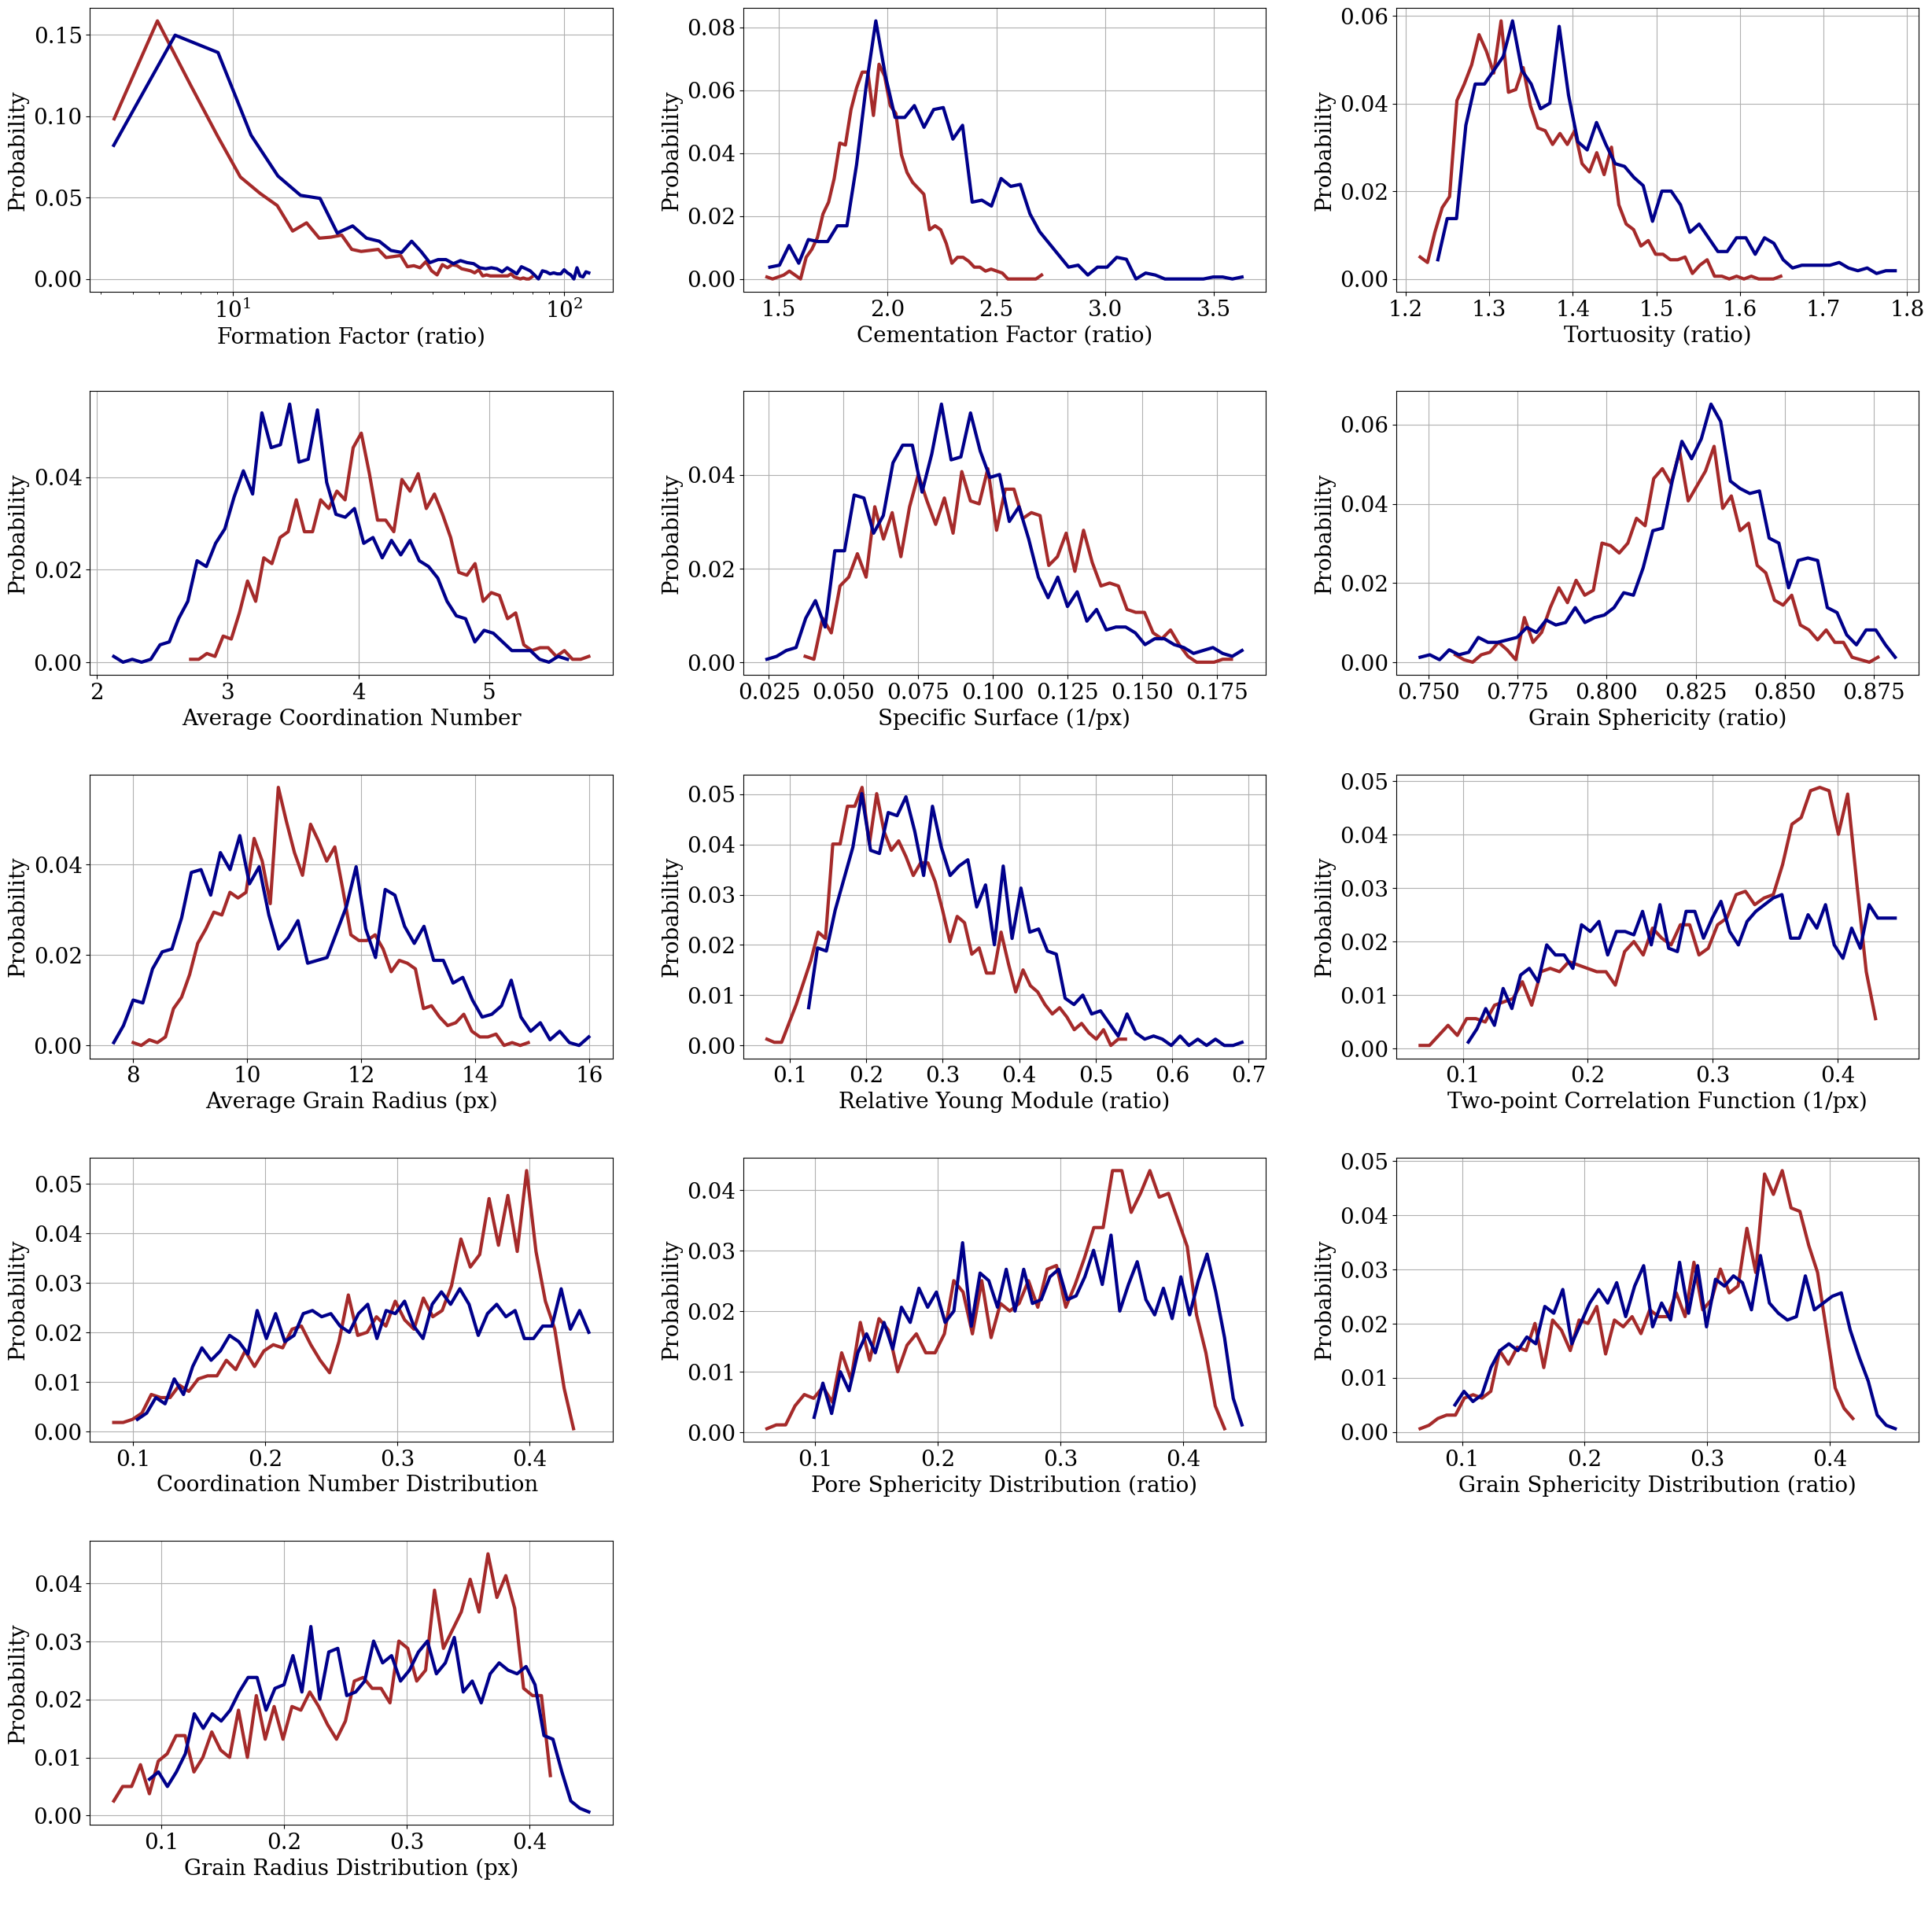

In [50]:
# uncomment any of the below

#plot_all_models()
#plot_finalmodel_groups()
#plot_singval_estimate_all()
#plot_singval_estimate_group()
#plot_rangeval_estimate_all()
#plot_rangeval_estimate_group()
#plot_singval_dist_all()
#plot_singval_dist_group()
